 # Boston House Prices Analysis
 ![Bostonhouse1](img/Bostonhouse1.png)

# Introduction

The Boston Housing dataset was originally created by David Harrison and Daniel Rubfield in 1978 for their paper named "Hedonic Housing prices and the demand for clean air". The paper's main aim was to investigate the methodological issues associated with using the Boston housing market data to measure the consumer's willingness to pay for clean air. The researchers themselves were bullish in how their research compared with other similar papers at the time. They claimed that their dataset was "superior to others" because the researchers created a large number of neighborhood variables and more reliable air pollution data. Following on from this paper the dataset itself was added to the UCI machine learning repository. The dataset has been adopted into machine learning and has been used to try and create robust models to predict the Median House Value through the analysis of certain variables in the data. 

The variables created for the project are listed below. Overal there are 14 varibales with 506 entries for each. For the purpose of this project I will be analysing the dataset and looking to generate a program capable of predicting the MEDV based on some input variables I will provide. I will also aim to find a link between house prices that are in the proximity of the Charles River and those that are not. 

In theory the value of the houses should be directly linked to RM as the bigger the house generally the higher the value. I will run my own anaylysis on the dataset and see if any other variables have a close link to the MEDV. 

## Variables Provided
CRIM: Per capita crime rate by town

ZN: Proportion of residential land zoned for lots over 25,000 sq. ft

INDUS: Proportion of non-retail business acres per town

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX: Nitric oxide concentration (parts per 10 million)

RM: Average number of rooms per dwelling

AGE: Proportion of owner-occupied units built prior to 1940

DIS: Weighted distances to five Boston employment centers

RAD: Index of accessibility to radial highways

TAX: Full-value property tax rate per $10,000

PTRATIO: Pupil-teacher ratio by town

B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town

LSTAT: Percentage of lower status of the population

MEDV: Median value of owner-occupied homes in $1000s

In [1]:
# I am importing the necessary packages to download and analyse this dataset
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd  
import seaborn as sns 
%matplotlib inline


In [2]:
# I am downloading the boston dataset directly from the sklearn package. 
from sklearn.datasets import load_boston

boston_dataset = load_boston()

boston_dataset

# I am printing the keys of the set to understand more of what is in the dataset.  
print(boston_dataset.keys()) 

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [3]:
# Converting the data in a dataframe making it more accesible to read and work with.  
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)

boston.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
# This dataset that has been downloaded does not have the target variable for the analysis included in its original iteration. 
boston['MEDV'] = boston_dataset.target

In [5]:
# This block of code adds the MEDV column to the dataset
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston['MEDV'] = boston_dataset.target
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# This is used to confirm that no data is missing and that all 506 data points are entered. 
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
print(boston.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [8]:
boston.loc[:,'MEDV'].mean()

22.532806324110698


Hugh 6:18 PM
@Beccy For the Inferential section you want to compare the House Prices along the Charles River - 'CHAS' variable with those not along the river. So compare both sets of prices using  at-test (box-plots for visualisation too) and try and determine if there is a statistically difference between the house prices for both sets of data

In [9]:
x = boston.iloc[:, 3]

print(x)

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     0.0
20     0.0
21     0.0
22     0.0
23     0.0
24     0.0
25     0.0
26     0.0
27     0.0
28     0.0
29     0.0
      ... 
476    0.0
477    0.0
478    0.0
479    0.0
480    0.0
481    0.0
482    0.0
483    0.0
484    0.0
485    0.0
486    0.0
487    0.0
488    0.0
489    0.0
490    0.0
491    0.0
492    0.0
493    0.0
494    0.0
495    0.0
496    0.0
497    0.0
498    0.0
499    0.0
500    0.0
501    0.0
502    0.0
503    0.0
504    0.0
505    0.0
Name: CHAS, Length: 506, dtype: float64


In [10]:
y = boston.iloc[:, 13]
print(y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
5      28.7
6      22.9
7      27.1
8      16.5
9      18.9
10     15.0
11     18.9
12     21.7
13     20.4
14     18.2
15     19.9
16     23.1
17     17.5
18     20.2
19     18.2
20     13.6
21     19.6
22     15.2
23     14.5
24     15.6
25     13.9
26     16.6
27     14.8
28     18.4
29     21.0
       ... 
476    16.7
477    12.0
478    14.6
479    21.4
480    23.0
481    23.7
482    25.0
483    21.8
484    20.6
485    21.2
486    19.1
487    20.6
488    15.2
489     7.0
490     8.1
491    13.6
492    20.1
493    21.8
494    24.5
495    23.1
496    19.7
497    18.3
498    21.2
499    17.5
500    16.8
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


In [11]:
# Created a new dataframe with just MEDV and CHAS variables to use for analysis
a = boston ['MEDV']
b = boston ['CHAS']

In [12]:
## trying to run a t test
import scipy.stats as ss

In [13]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html code to generate the t test
ss.ttest_ind 

<function scipy.stats.stats.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate')>

In [14]:
#generate the t test and results
ss.ttest_ind(x,y)

Ttest_indResult(statistic=-54.9210289745203, pvalue=1.4651540072350996e-305)

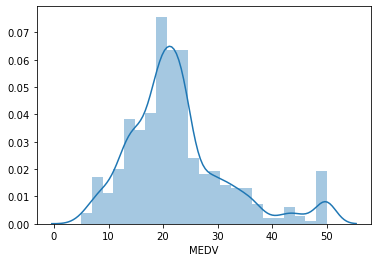

In [15]:
sns.distplot(a);

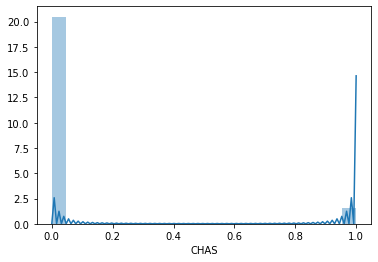

In [16]:
sns.distplot(b);

In [17]:
import matplotlib.pyplot as plt

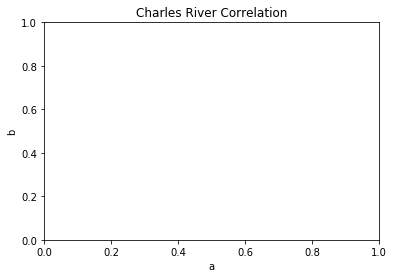

In [18]:
import matplotlib.pyplot as plt
plt.title('Charles River Correlation')

plt.xlabel('a')
plt.ylabel('b')
plt.show()

ModuleNotFoundError: No module named 'plotly'